Preprocessing part

In [12]:
import pandas as pd
df = pd.read_csv(r'titanic-passengers.csv', delimiter=';')
print (df)


     PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0            343       No       2  ...  13.0000    NaN         S
1             76       No       3  ...   7.6500  F G73         S
2            641       No       3  ...   7.8542    NaN         S
3            568       No       3  ...  21.0750    NaN         S
4            672       No       1  ...  52.0000    B71         S
..           ...      ...     ...  ...      ...    ...       ...
886           10      Yes       2  ...  30.0708    NaN         C
887           61       No       3  ...   7.2292    NaN         C
888          535       No       3  ...   8.6625    NaN         S
889          102       No       3  ...   7.8958    NaN         S
890          428      Yes       2  ...  26.0000    NaN         S

[891 rows x 12 columns]


In [13]:
print( df.head())

   PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0          343       No       2  ...  13.0000    NaN         S
1           76       No       3  ...   7.6500  F G73         S
2          641       No       3  ...   7.8542    NaN         S
3          568       No       3  ...  21.0750    NaN         S
4          672       No       1  ...  52.0000    B71         S

[5 rows x 12 columns]


In [14]:
print( df.isnull())

     PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0          False     False   False  False  ...   False  False   True     False
1          False     False   False  False  ...   False  False  False     False
2          False     False   False  False  ...   False  False   True     False
3          False     False   False  False  ...   False  False   True     False
4          False     False   False  False  ...   False  False  False     False
..           ...       ...     ...    ...  ...     ...    ...    ...       ...
886        False     False   False  False  ...   False  False   True     False
887        False     False   False  False  ...   False  False   True     False
888        False     False   False  False  ...   False  False   True     False
889        False     False   False  False  ...   False  False   True     False
890        False     False   False  False  ...   False  False   True     False

[891 rows x 12 columns]


In [15]:
print( df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
None


In [16]:
print ( df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
print ( df.isnull().sum().sum())


866


# This function shows you some basic descriptive statistics for all numeric columns

.describe() only analyzes numeric columns by default, but you can provide other data types if you use the include parameter

In [18]:
print( df.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [19]:
print ( df.fillna(0) )

     PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0            343       No       2  ...  13.0000      0         S
1             76       No       3  ...   7.6500  F G73         S
2            641       No       3  ...   7.8542      0         S
3            568       No       3  ...  21.0750      0         S
4            672       No       1  ...  52.0000    B71         S
..           ...      ...     ...  ...      ...    ...       ...
886           10      Yes       2  ...  30.0708      0         C
887           61       No       3  ...   7.2292      0         C
888          535       No       3  ...   8.6625      0         S
889          102       No       3  ...   7.8958      0         S
890          428      Yes       2  ...  26.0000      0         S

[891 rows x 12 columns]


Visualization part

Visualize the correlation between Sex and Age 

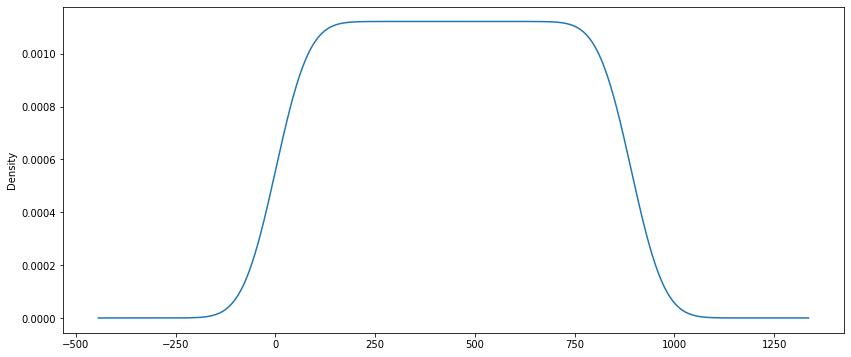

In [51]:
df['PassengerId'].plot(kind='density', figsize=(14,6))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


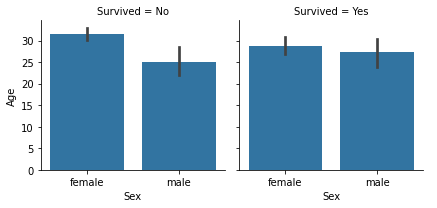

In [22]:

grid= sns.FacetGrid(df, col='Survived')
grid.map(sns.barplot,'Sex','Age')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


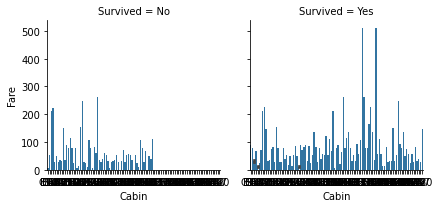

In [23]:

grid= sns.FacetGrid(df, col='Survived')
grid.map(sns.barplot,'Cabin','Fare')
grid.add_legend()


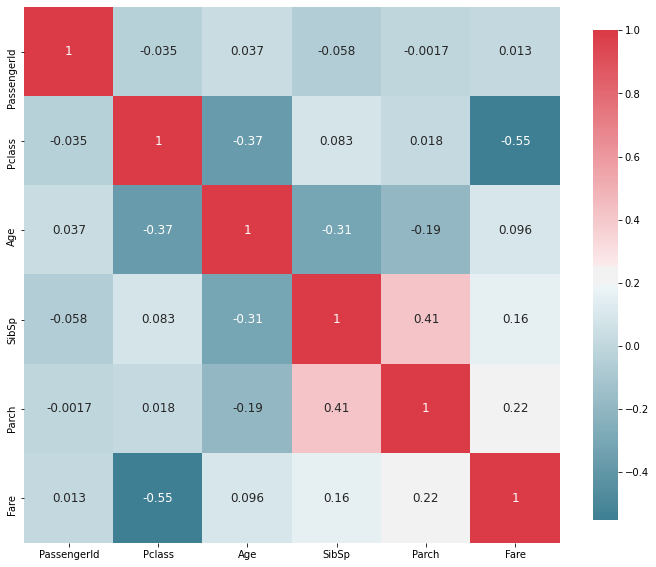

In [24]:
import matplotlib.pyplot as plt

def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map( df )
    



a medium correlation between SibSp and Parch =0.41
/
a medium negative correlation between Pclass and Fare =-0.55



Use the groupby function combined with the mean() to view the relation between Pclass and survived 

In [ ]:
df.groupby(by='Survived')['Pclass'].mean()

In [ ]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer”,
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty"
                  "the Countess": "Royalty",
                    "Dona":       "Royalty”,
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs
                    "Master" :    "Master"
                    }

In [21]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [50]:
df['Title']=df.Name.str.extract(' ([A-Za-z]+).')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mr
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr


In [53]:
df=df.drop(['Name'], axis=1)


KeyError: ignored

In [54]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,NaN,C,Mrs
887,61,No,3,male,22.0,0,0,2669,7.2292,NaN,C,Mr
888,535,No,3,female,30.0,0,0,315084,8.6625,NaN,S,Miss
889,102,No,3,male,NaN,0,0,349215,7.8958,NaN,S,Mr


In [63]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer" ,
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty" ,
                "The Countess":   "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs" ,
                    "Master" :    "Master"
                    } 
df.replace({"Title": Title_Dictionary}) 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,Mrs
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,Mrs
3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,NaN,C,Mrs
887,61,No,3,male,22.0,0,0,2669,7.2292,NaN,C,Mrs
888,535,No,3,female,30.0,0,0,315084,8.6625,NaN,S,Miss
889,102,No,3,male,NaN,0,0,349215,7.8958,NaN,S,Mrs


In [66]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Title']=encoder.fit_transform(df['Title'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,17
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,17
2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,17
3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,18
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,17
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,NaN,C,18
887,61,No,3,male,22.0,0,0,2669,7.2292,NaN,C,17
888,535,No,3,female,30.0,0,0,315084,8.6625,NaN,S,14
889,102,No,3,male,NaN,0,0,349215,7.8958,NaN,S,17


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


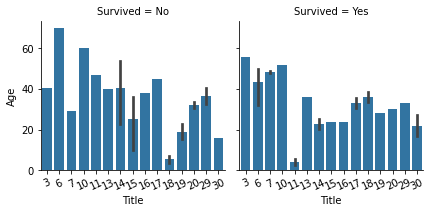

In [72]:
grid= sns.FacetGrid(df, col='Survived')
grid.map(sns.barplot,'Title','Age')
grid.set_xticklabels(rotation = 25)
grid.add_legend()

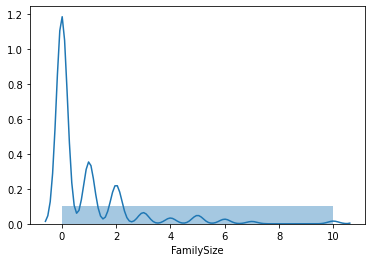

In [86]:
sns.distplot(df["FamilySize"], bins=1,hist=True,kde=True)

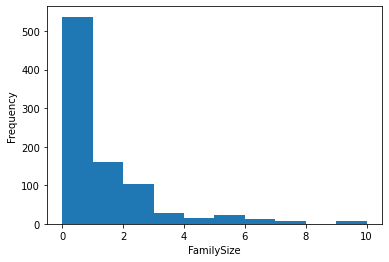

In [87]:
plt.xlabel("FamilySize")
df['FamilySize'].plot.hist()

In [80]:
df['FamilySize']=df['Parch']+df['SibSp']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,17,0
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,17,0
2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,17,0
3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,18,4
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,NaN,C,18,1
887,61,No,3,male,22.0,0,0,2669,7.2292,NaN,C,17,0
888,535,No,3,female,30.0,0,0,315084,8.6625,NaN,S,14,0
889,102,No,3,male,NaN,0,0,349215,7.8958,NaN,S,17,0
